In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Data input:

Covid_dt_train = pd.read_csv('Covid_dt_train.csv')

Covid_dt_train.Ciudad = pd.get_dummies(Covid_dt_train['Ciudad'])
Covid_dt_train.cod_ase = pd.get_dummies(Covid_dt_train['cod_ase'])

Covid_dt_train = Covid_dt_train.drop(['cual_ot_si'], axis = 1)
Covid_dt_train = Covid_dt_train.drop(['sintomatico'], axis = 1)
Covid_dt_train = Covid_dt_train.drop(['Sintomas'], axis = 1)
Covid_dt_train = Covid_dt_train.drop(['sem_ges'], axis = 1)
Covid_dt_train = Covid_dt_train.drop(['trombocito'], axis = 1)
Covid_dt_train = Covid_dt_train.drop(['plaquetas'], axis = 1)
Covid_dt_train = Covid_dt_train.drop(['gp_discapa'], axis = 1)
Covid_dt_train = Covid_dt_train.drop(['gp_desplaz'], axis = 1)
Covid_dt_train = Covid_dt_train.drop(['gp_migrant'], axis = 1)
Covid_dt_train = Covid_dt_train.drop(['gp_gestan'], axis = 1)
Covid_dt_train = Covid_dt_train.drop(['gp_pobicbf'], axis = 1)
Covid_dt_train = Covid_dt_train.drop(['gp_desmovi'], axis = 1)
Covid_dt_train = Covid_dt_train.drop(['gp_psiquia'], axis = 1)
Covid_dt_train = Covid_dt_train.drop(['gp_vic_vio'], axis = 1)

#-----------------------------------------------------------------------------

Covid_dt_test = pd.read_csv('Covid_dt_test.csv')

Covid_dt_test.Ciudad = pd.get_dummies(Covid_dt_test['Ciudad'])
Covid_dt_test.cod_ase = pd.get_dummies(Covid_dt_test['cod_ase'])

Covid_dt_test = Covid_dt_test.drop(['cual_ot_si'], axis = 1)
Covid_dt_test = Covid_dt_test.drop(['sintomatico'], axis = 1)
Covid_dt_test = Covid_dt_test.drop(['Sintomas'], axis = 1)
Covid_dt_test = Covid_dt_test.drop(['sem_ges'], axis = 1)
Covid_dt_test = Covid_dt_test.drop(['trombocito'], axis = 1)
Covid_dt_test = Covid_dt_test.drop(['plaquetas'], axis = 1)
Covid_dt_test = Covid_dt_test.drop(['gp_discapa'], axis = 1)
Covid_dt_test = Covid_dt_test.drop(['gp_desplaz'], axis = 1)
Covid_dt_test = Covid_dt_test.drop(['gp_migrant'], axis = 1)
Covid_dt_test = Covid_dt_test.drop(['gp_gestan'], axis = 1)
Covid_dt_test = Covid_dt_test.drop(['gp_pobicbf'], axis = 1)
Covid_dt_test = Covid_dt_test.drop(['gp_desmovi'], axis = 1)
Covid_dt_test = Covid_dt_test.drop(['gp_psiquia'], axis = 1)
Covid_dt_test = Covid_dt_test.drop(['gp_vic_vio'], axis = 1)


In [3]:
Covid_dt_train.head(10)

,edad,cod_ase,gp_carcela,gp_indigen,gp_mad_com,tos,fiebre,odinofagia,dif_res,adinamia,...,cancer,desnutricion,obesidad,ins_renal,fumador,hipertensi,tuberculos,Ciudad,Defuncion,Sexo2
0,67,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,58,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,24,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,46,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,25,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
6,90,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,25,0,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,41,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
9,29,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [4]:
Covid_dt_test.head(10)

,edad,cod_ase,gp_carcela,gp_indigen,gp_mad_com,tos,fiebre,odinofagia,dif_res,adinamia,...,cancer,desnutricion,obesidad,ins_renal,fumador,hipertensi,tuberculos,Ciudad,Defuncion,Sexo2
0,37,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,29,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,33,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,31,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,38,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,39,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,49,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
9,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Training dataset

In [5]:
x_train = Covid_dt_train.drop(['Defuncion'], axis = 1)
y_train = Covid_dt_train['Defuncion']

In [6]:
variable_name = list(x_train.columns)
variable_name

['edad',
 'cod_ase',
 'gp_carcela',
 'gp_indigen',
 'gp_mad_com',
 'tos',
 'fiebre',
 'odinofagia',
 'dif_res',
 'adinamia',
 'rinorrea',
 'conjuntivi',
 'cefalea',
 'diarrea',
 'perd_gusto',
 'otros_sint',
 'asma',
 'epoc',
 'diabetes',
 'vih',
 'enf_card',
 'cancer',
 'desnutricion',
 'obesidad',
 'ins_renal',
 'fumador',
 'hipertensi',
 'tuberculos',
 'Ciudad',
 'Sexo2']

In [7]:
CV_log_reg = LogisticRegressionCV(cv = 10, solver = 'liblinear', max_iter = 1000, random_state=0).fit(x_train, y_train)

print(classification_report(y_train, CV_log_reg.predict(x_train)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     39268
           1       0.00      0.00      0.00       802

    accuracy                           0.98     40070
   macro avg       0.49      0.50      0.49     40070
weighted avg       0.96      0.98      0.97     40070



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
Coefficients = CV_log_reg.coef_
Coefficients

array([[-7.80392669e-02, -1.85730931e-04, -4.62354546e-03,
         7.06769224e-05, -4.93559966e-06, -4.57454460e-02,
        -3.11593325e-02, -6.31505576e-02,  2.79165883e-02,
        -4.58494569e-02, -3.67257934e-02, -3.63397247e-03,
        -5.70076905e-02, -1.23624979e-02, -3.79951628e-02,
        -9.99767651e-03, -6.53945962e-03,  1.19099459e-02,
         1.35152892e-02, -1.44768454e-04,  9.96927494e-03,
         3.63984016e-03,  9.29986294e-04,  4.25756588e-03,
         5.37069626e-03,  1.20460422e-03,  2.11306064e-02,
         4.40586906e-04,  2.26331836e-04, -5.38135998e-02]])

In [92]:
#Coefficients = pd.Series([Coefficients, index = variable_name])

In [7]:
CV_log_reg.intercept_

array([-0.14756571])

In [8]:
CV_log_reg.score(x_train, y_train)

0.9799850262041427

In [9]:
print('Intercept:' + str(CV_log_reg.intercept_) + "Coefficients:" + str(CV_log_reg.coef_))

Intercept:[-0.14756571]Coefficients:[[-7.80392669e-02 -1.85730931e-04 -4.62354546e-03  7.06769224e-05
  -4.93559966e-06 -4.57454460e-02 -3.11593325e-02 -6.31505576e-02
   2.79165883e-02 -4.58494569e-02 -3.67257934e-02 -3.63397247e-03
  -5.70076905e-02 -1.23624979e-02 -3.79951628e-02 -9.99767651e-03
  -6.53945962e-03  1.19099459e-02  1.35152892e-02 -1.44768454e-04
   9.96927494e-03  3.63984016e-03  9.29986294e-04  4.25756588e-03
   5.37069626e-03  1.20460422e-03  2.11306064e-02  4.40586906e-04
   2.26331836e-04 -5.38135998e-02]]


In [8]:
from sklearn.utils import resample
Xsamp1, ysamp1 = resample(x_train, y_train, n_samples=5500)
Xsamp2, ysamp2 = resample(x_train, y_train, n_samples=6500)
Xsamp3, ysamp3 = resample(x_train, y_train, n_samples=7500)
Xsamp4, ysamp4 = resample(x_train, y_train, n_samples=2000)
Xsamp5, ysamp5 = resample(x_train, y_train, n_samples=2500)
Xsamp6, ysamp6 = resample(x_train, y_train, n_samples=4000)
Xsamp7, ysamp7 = resample(x_train, y_train, n_samples=5000)
Xsamp8, ysamp8 = resample(x_train, y_train, n_samples=6000)
Xsamp9, ysamp9 = resample(x_train, y_train, n_samples=7000)
Xsamp10, ysamp10 = resample(x_train, y_train, n_samples=8000)
Xsamp11, ysamp11 = resample(x_train, y_train, n_samples=9000)
Xsamp12, ysamp12 = resample(x_train, y_train, n_samples=10000)
Xsamp13, ysamp13 = resample(x_train, y_train, n_samples=11000)
Xsamp14, ysamp14 = resample(x_train, y_train, n_samples=12000)
Xsamp15, ysamp15 = resample(x_train, y_train, n_samples=13000)
Xsamp16, ysamp16 = resample(x_train, y_train, n_samples=14000)
Xsamp17, ysamp17 = resample(x_train, y_train, n_samples=15000)
Xsamp18, ysamp18 = resample(x_train, y_train, n_samples=16000)
Xsamp19, ysamp19 = resample(x_train, y_train, n_samples=17000)
Xsamp20, ysamp20 = resample(x_train, y_train, n_samples=18000)
Xsamp21, ysamp21 = resample(x_train, y_train, n_samples=19000)
Xsamp22, ysamp22 = resample(x_train, y_train, n_samples=20000)

In [9]:
CI_coef1 = CV_log_reg.fit(Xsamp1, ysamp1)
CI_coef2 = CV_log_reg.fit(Xsamp2, ysamp2)
CI_coef3 = CV_log_reg.fit(Xsamp3, ysamp3)
CI_coef4 = CV_log_reg.fit(Xsamp4, ysamp4)
CI_coef5 = CV_log_reg.fit(Xsamp5, ysamp5)

In [10]:
CI_coef6 = CV_log_reg.fit(Xsamp6, ysamp6)
CI_coef7 = CV_log_reg.fit(Xsamp7, ysamp7)
CI_coef8 = CV_log_reg.fit(Xsamp8, ysamp8)
CI_coef9 = CV_log_reg.fit(Xsamp9, ysamp9)
CI_coef10 = CV_log_reg.fit(Xsamp10, ysamp10)
CI_coef11 = CV_log_reg.fit(Xsamp11, ysamp11)
CI_coef12 = CV_log_reg.fit(Xsamp12, ysamp12)
CI_coef13 = CV_log_reg.fit(Xsamp13, ysamp13)
CI_coef14 = CV_log_reg.fit(Xsamp14, ysamp14)
CI_coef15 = CV_log_reg.fit(Xsamp15, ysamp15)
CI_coef16 = CV_log_reg.fit(Xsamp16, ysamp16)
CI_coef17 = CV_log_reg.fit(Xsamp17, ysamp17)
CI_coef18 = CV_log_reg.fit(Xsamp18, ysamp18)
CI_coef19 = CV_log_reg.fit(Xsamp19, ysamp19)
CI_coef20 = CV_log_reg.fit(Xsamp20, ysamp20)
CI_coef21 = CV_log_reg.fit(Xsamp21, ysamp21)
CI_coef22 = CV_log_reg.fit(Xsamp22, ysamp22)

Number of regressors

In [11]:
# Number regressors:
n = 30

# Number of Bootstrap samples;

m = 23

In [12]:
coef1 = CI_coef1.coef_.reshape(n,1)
coef2 = CI_coef2.coef_.reshape(n,1)
coef3 = CI_coef3.coef_.reshape(n,1)
coef4 = CI_coef4.coef_.reshape(n,1)
coef5 = CI_coef5.coef_.reshape(n,1)
coef6 = CI_coef6.coef_.reshape(n,1)
coef7 = CI_coef7.coef_.reshape(n,1)
coef8 = CI_coef8.coef_.reshape(n,1)
coef9 = CI_coef9.coef_.reshape(n,1)
coef10 = CI_coef10.coef_.reshape(n,1)
coef11 = CI_coef11.coef_.reshape(n,1)
coef12 = CI_coef12.coef_.reshape(n,1)
coef13 = CI_coef13.coef_.reshape(n,1)
coef14 = CI_coef14.coef_.reshape(n,1)
coef15 = CI_coef15.coef_.reshape(n,1)
coef16 = CI_coef16.coef_.reshape(n,1)
coef17 = CI_coef17.coef_.reshape(n,1)
coef18 = CI_coef18.coef_.reshape(n,1)
coef19 = CI_coef19.coef_.reshape(n,1)
coef20 = CI_coef20.coef_.reshape(n,1)
coef21 = CI_coef21.coef_.reshape(n,1)
coef22 = CI_coef22.coef_.reshape(n,1)
coef_CV = CV_log_reg.coef_.reshape(n,1)

column_names_coef = ['coef1', 'coef2', 'coef3', 'coef4', 'coef5', 'coef6', 'coef7', 'coef8',
                     'coef9', 'coef10', 'coef11', 'coef12', 'coef13', 'coef14', 'coef15', 'coef16',
                     'coef17', 'coef18', 'coef19', 'coef20', 'coef21', 'coef22', 'coef_CV']

The following `array` has the the results of the bootstrap assessment.

In [13]:
coefficients = np.array([coef1, coef2, coef3, coef4, coef5, coef6, coef7, coef8,
                         coef9, coef10, coef11, coef12, coef13, coef14, coef15,
                         coef16, coef17, coef18, coef19, coef20, coef21, coef22, coef_CV]).reshape(n, m)

In [14]:
coefficients

array([[ 6.92519390e-02, -1.06087281e-01, -2.74084603e+00,
        -1.18321019e+00, -9.95747222e-03,  4.18738392e-01,
         2.63165574e-01, -6.49867623e-01,  1.79740170e+00,
        -1.17458786e-01, -4.98527247e-03, -1.64131684e+00,
        -7.45536643e-01, -1.59122090e-03, -7.13676506e-01,
        -1.10141964e+00, -8.16065389e-01, -3.90246183e-01,
         4.42606040e-01,  8.49668908e-01, -1.27355868e-01,
         2.03775732e+00,  5.95649040e-01],
       [ 7.16193347e-01,  1.86041592e+00, -3.61191543e-01,
        -2.25497524e-01,  2.61990780e+00,  1.05314628e+00,
         4.41132773e-01,  6.92519390e-02, -1.06087281e-01,
        -2.74084603e+00, -1.18321019e+00, -9.95747222e-03,
         4.18738392e-01,  2.63165574e-01, -6.49867623e-01,
         1.79740170e+00, -1.17458786e-01, -4.98527247e-03,
        -1.64131684e+00, -7.45536643e-01, -1.59122090e-03,
        -7.13676506e-01, -1.10141964e+00],
       [-8.16065389e-01, -3.90246183e-01,  4.42606040e-01,
         8.49668908e-01, -1.2

In [15]:
betas = pd.DataFrame(coefficients, index = variable_name, columns = column_names_coef)

In [16]:
betas.head(29)

,coef1,coef2,coef3,coef4,coef5,coef6,coef7,coef8,coef9,coef10,...,coef14,coef15,coef16,coef17,coef18,coef19,coef20,coef21,coef22,coef_CV
edad,0.069252,-0.106087,-2.740846,-1.183210,-0.009957,0.418738,0.263166,-0.649868,1.797402,-0.117459,...,-0.001591,-0.713677,-1.101420,-0.816065,-0.390246,0.442606,0.849669,-0.127356,2.037757,0.595649
cod_ase,0.716193,1.860416,-0.361192,-0.225498,2.619908,1.053146,0.441133,0.069252,-0.106087,-2.740846,...,0.263166,-0.649868,1.797402,-0.117459,-0.004985,-1.641317,-0.745537,-0.001591,-0.713677,-1.101420
gp_carcela,-0.816065,-0.390246,0.442606,0.849669,-0.127356,2.037757,0.595649,0.716193,1.860416,-0.361192,...,0.441133,0.069252,-0.106087,-2.740846,-1.183210,-0.009957,0.418738,0.263166,-0.649868,1.797402
gp_indigen,-0.117459,-0.004985,-1.641317,-0.745537,-0.001591,-0.713677,-1.101420,-0.816065,-0.390246,0.442606,...,0.595649,0.716193,1.860416,-0.361192,-0.225498,2.619908,1.053146,0.441133,0.069252,-0.106087
gp_mad_com,-2.740846,-1.183210,-0.009957,0.418738,0.263166,-0.649868,1.797402,-0.117459,-0.004985,-1.641317,...,-1.101420,-0.816065,-0.390246,0.442606,0.849669,-0.127356,2.037757,0.595649,0.716193,1.860416
tos,-0.361192,-0.225498,2.619908,1.053146,0.441133,0.069252,-0.106087,-2.740846,-1.183210,-0.009957,...,1.797402,-0.117459,-0.004985,-1.641317,-0.745537,-0.001591,-0.713677,-1.101420,-0.816065,-0.390246
fiebre,0.442606,0.849669,-0.127356,2.037757,0.595649,0.716193,1.860416,-0.361192,-0.225498,2.619908,...,-0.106087,-2.740846,-1.183210,-0.009957,0.418738,0.263166,-0.649868,1.797402,-0.117459,-0.004985
odinofagia,-1.641317,-0.745537,-0.001591,-0.713677,-1.101420,-0.816065,-0.390246,0.442606,0.849669,-0.127356,...,1.860416,-0.361192,-0.225498,2.619908,1.053146,0.441133,0.069252,-0.106087,-2.740846,-1.183210
dif_res,-0.009957,0.418738,0.263166,-0.649868,1.797402,-0.117459,-0.004985,-1.641317,-0.745537,-0.001591,...,-0.390246,0.442606,0.849669,-0.127356,2.037757,0.595649,0.716193,1.860416,-0.361192,-0.225498
adinamia,2.619908,1.053146,0.441133,0.069252,-0.106087,-2.740846,-1.183210,-0.009957,0.418738,0.263166,...,-0.004985,-1.641317,-0.745537,-0.001591,-0.713677,-1.101420,-0.816065,-0.390246,0.442606,0.849669


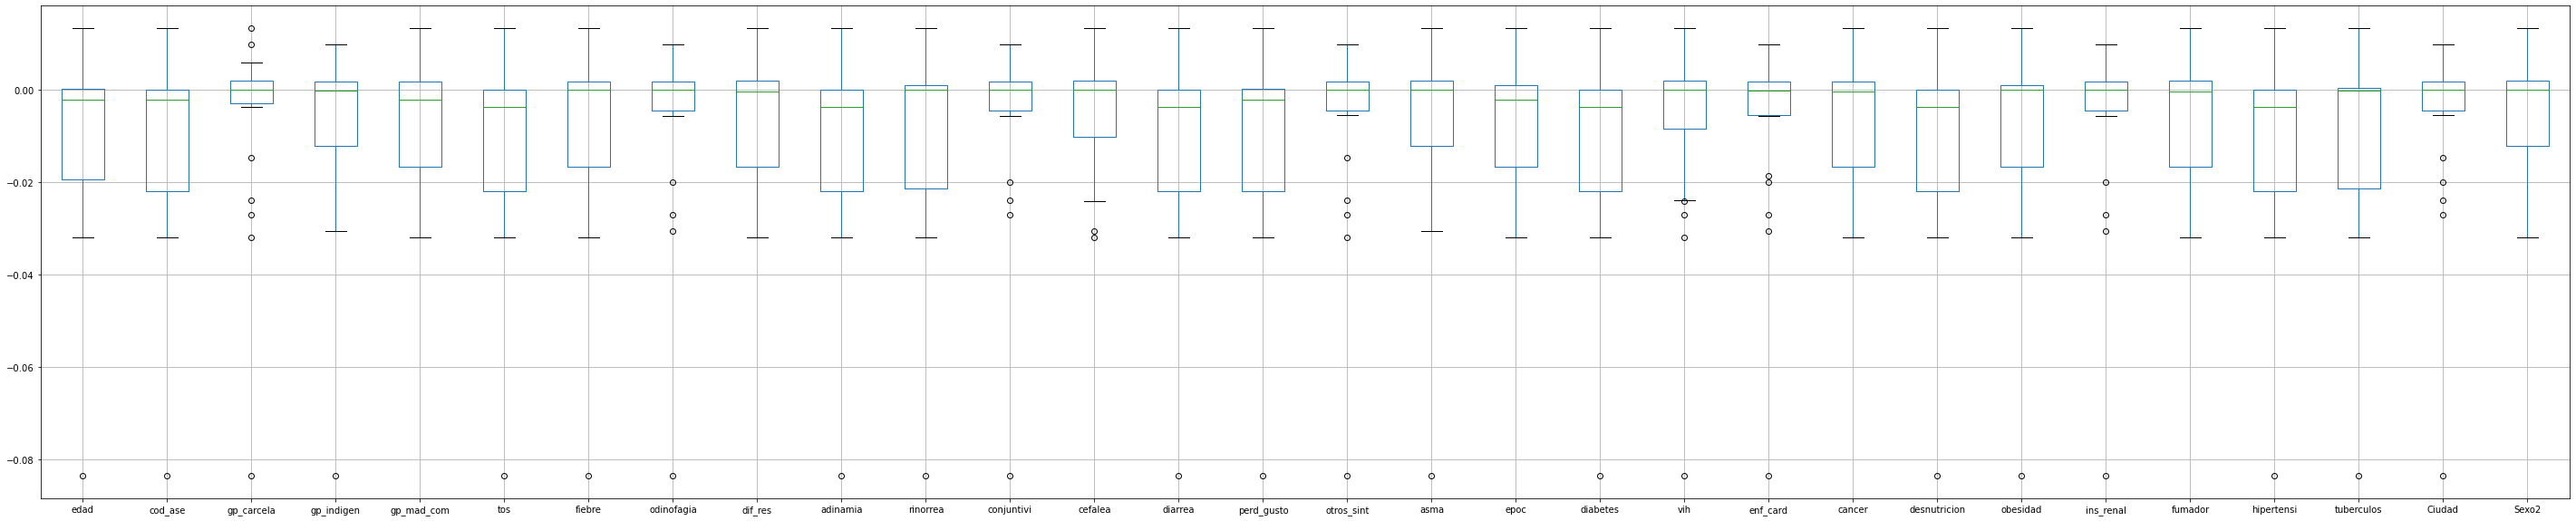

In [35]:
betas.T.boxplot(figsize=(50,10))
plt.show()

In [132]:
betas_mean = betas.T.mean()
betas_quantile25 = betas.T.quantile(0.25)
betas_quantile75 = betas.T.quantile(0.75)

In [125]:
betas_mean.head()

edad          0.037131
cod_ase       0.156818
gp_discapa   -0.013058
gp_desplaz    0.149749
gp_migrant   -0.016517
dtype: float64

In [ ]:
import plotly.express as px

fig2 = px.box(betas.T, points = 'all', width = 1400, height = 500)
fig2.show()

# Test dataset

In [7]:
x_test = Covid_dt_test.drop(['Defuncion'], axis = 1)
y_test= Covid_dt_test['Defuncion']

In [25]:
Predictions_log_reg = CV_log_reg.predict(x_test)

## Accuracy

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test, CV_log_reg.predict(x_test))

0.9800339422980933

In [28]:
Confusion_matrix = confusion_matrix(y_test, CV_log_reg.predict(x_test))
Confusion_matrix

array([[9817,    0],
       [ 200,    0]])

In [29]:
Confusion_Matrix = pd.DataFrame({''})

There are:

* 9817 true negative predictions. 
* 200 false negative predictios.
* 0 false positive predictions.
* 0 true positive predictions.

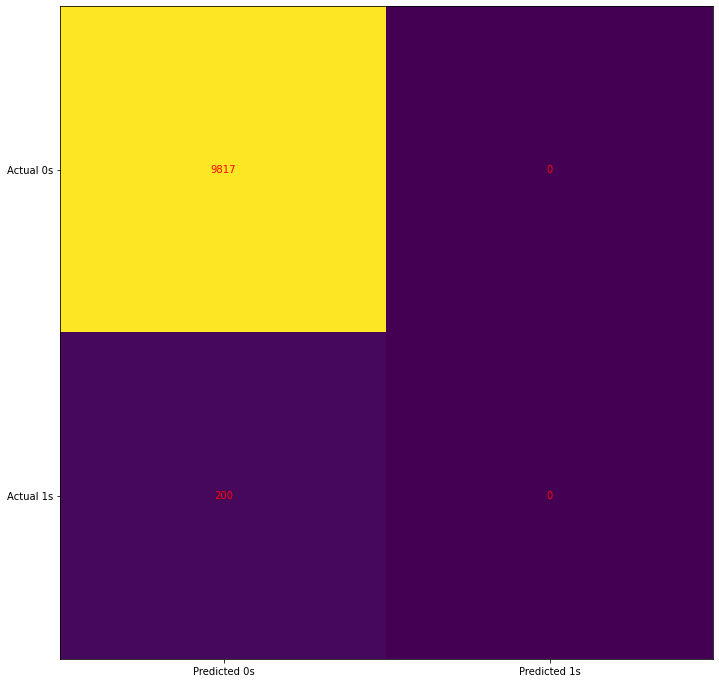

In [42]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(Confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, Confusion_matrix[i, j], ha='center', va='center', color='red')
plt.show()

# Decision Trees

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn import tree

classf_trees = tree.DecisionTreeClassifier()

In [9]:
classf_trees_model = classf_trees.fit(x_train, y_train)

In [10]:
classf_trees_model_pred = classf_trees.predict(x_test)

In [11]:
Confusion_matrix_trees = confusion_matrix(y_test, classf_trees_model_pred)
Confusion_matrix_trees

array([[9660,  157],
       [ 161,   39]])

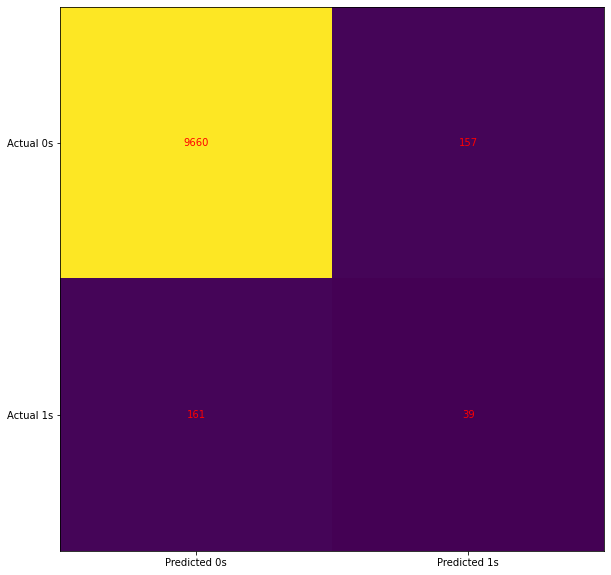

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(Confusion_matrix_trees)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, Confusion_matrix_trees[i, j], ha='center', va='center', color='red')
plt.show()

In [14]:
import graphviz 
dot_data = tree.export_graphviz(classf_trees_model, out_file=None)
graph = graphviz.Source(dot_data) 
# tree.plot_tree(classf_trees) 

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
classf_rand_forest = RandomForestClassifier(n_estimators = 29)

In [56]:
classf_rand_forest_model = classf_rand_forest.fit(x_train, y_train)

In [72]:
classf_rand_forest_model_scores = cross_val_score(classf_rand_forest_model, x_train, y_train, cv = 10)
classf_rand_forest_model_scores.mean()

0.9770152233591215

In [57]:
classf_rand_forest_pred = classf_rand_forest.predict(x_test)

In [58]:
Confusion_matrix_random_forest = confusion_matrix(y_test, classf_rand_forest_pred)
Confusion_matrix_random_forest

array([[9764,   53],
       [ 181,   19]])

## Extremely Randomized Trees

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [73]:
classf_extrem_rand_forest = ExtraTreesClassifier(n_estimators=29, max_depth=None, min_samples_split=2, random_state=0)

In [74]:
classf_extrem_rand_forest_scores = cross_val_score(classf_extrem_rand_forest, x_train, y_train, cv = 10)

In [71]:
classf_extrem_rand_forest_scores.mean()

0.9687297229847767

In [76]:
classf_extrem_rand_forest_model = classf_extrem_rand_forest.fit(x_train, y_train)

In [77]:
classf_extrem_rand_forest_pred = classf_extrem_rand_forest_model.predict(x_test)

In [78]:
Confusion_matrix_extrem_random_forest = confusion_matrix(y_test, classf_extrem_rand_forest_pred)
Confusion_matrix_extrem_random_forest

array([[9722,   95],
       [ 174,   26]])

# AdaBoost

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [80]:
classf_AdaBoost = AdaBoostClassifier(n_estimators = n)

In [81]:
classf_AdaBoost_model = classf_AdaBoost.fit(x_train, y_train)

In [82]:
classf_AdaBoost_model_pred = classf_AdaBoost_model.predict(x_test)

In [83]:
Confusion_matrix_classf_AdaBoost = confusion_matrix(y_test, classf_AdaBoost_model_pred)
Confusion_matrix_classf_AdaBoost

array([[9768,   49],
       [ 163,   37]])

## Tuning parameters and model search

In [87]:
from sklearn.model_selection import GridSearchCV

#param_dist = {
# 'n_estimators': [1, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30],
# 'learning_rate' : [0.01,0.05,0.1,0.3,1],
# 'loss' : ['linear', 'square', 'exponential']
# }

#classf_AdaBoost_CV = GridSearchCV(AdaBoostClassifier(),
# param_distributions = param_dist,
# cv = 10,
# n_iter = 1000,
# n_jobs=-1)

#classf_AdaBoost_CV_model = classf_AdaBoost_CV.fit(x_train, y_train)

# Support Vector Machine

In [91]:
from sklearn import svm

In [92]:
classf_svm = svm.SVC()


In [94]:
classf_svm_model = classf_svm.fit(x_train, y_train)

In [95]:
classf_svm_model_pred = classf_svm_model.predict(x_test)

In [96]:
Confusion_matrix_svm = confusion_matrix(y_test, classf_svm_model_pred)
Confusion_matrix_svm

array([[9817,    0],
       [ 200,    0]])

# Neural Networks:

## Multi-Layer Perceptron

In [98]:
from sklearn.neural_network import MLPClassifier

In [104]:
clf_nn_mlp = MLPClassifier(solver = 'adam', max_iter = 10e8, alpha=1e-5, hidden_layer_sizes=(30, 2), random_state=1)

In [106]:
#clf_nn_mlp_model = clf_nn_mlp.fit(x_train, y_train)

In [ ]:
#clf_nn_mlp_model_pred = clf_nn_mlp_model.predict(x_test)

# K-Nearest Neighbors

## Nearest Centroid

In [107]:
from sklearn.neighbors import NearestCentroid

In [108]:
clf_knn = NearestCentroid()
clf_knn_model = clf_knn.fit(x_train, y_train)
#NearestCentroid()

In [109]:
clf_knn_model_pred = clf_knn_model.predict(x_test)

In [112]:
Confusion_matrix_knn = confusion_matrix(y_test, clf_knn_model_pred)
Confusion_matrix_knn

array([[7914, 1903],
       [  22,  178]])

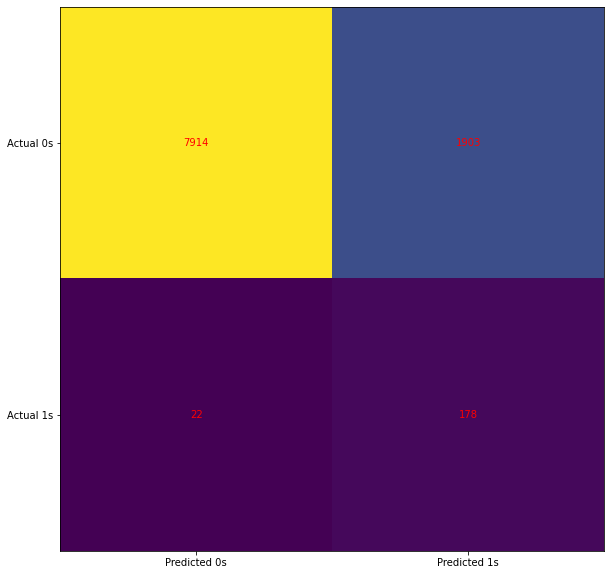

In [113]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(Confusion_matrix_knn)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, Confusion_matrix_knn[i, j], ha='center', va='center', color='red')
plt.show()

## Number of Neighbors

In [115]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn3 = KNeighborsClassifier(n_neighbors=3)

In [116]:
clf_knn3_mod = clf_knn3.fit(x_train, y_train)

In [117]:
clf_knn3_mod_pred = clf_knn3_mod.predict(x_test)

In [118]:
Confusion_matrix_knn3 = confusion_matrix(y_test, clf_knn3_mod_pred)
Confusion_matrix_knn3

array([[9763,   54],
       [ 174,   26]])

In [119]:
def NumNeighbors(n):
    clf_knn = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    
    return(clf_knn)

In [120]:
clf_1knn = NumNeighbors(1)

In [121]:
clf_1knn_pred = clf_1knn.predict(x_test)

In [122]:
Confusion_matrix_knn1 = confusion_matrix(y_test, clf_1knn_pred)
Confusion_matrix_knn1

array([[9680,  137],
       [ 160,   40]])

In [123]:
clf_1knn_pred_train = clf_1knn.predict(x_train)
Confusion_matrix_knn1_train = confusion_matrix(y_test, clf_1knn_pred)
Confusion_matrix_knn1_train

array([[9680,  137],
       [ 160,   40]])